**Denoising by AEs**

In [ ]:
###Add python library here####
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
figsize=(15, 6)
plt.style.use('fivethirtyeight')
import torch.optim as optim

# Loading dataset

In [ ]:
# Fashion-MNIST data loader


####TODO####


img_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(,)
])
train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=img_transform,
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=img_transform)

batch_size = 100
n_iters = 20000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
####TODO####

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Autoencoder architecture

In [ ]:
class autoencoder(nn.Module):
    def __init__(self, dim1, dim2):
        super(autoencoder, self).__init__()
        ###TODO###
        self.encoder = nn.Sequential(nn.Linear(28*28, dim1),
                                     nn.ReLU(),
                                     nn.Linear(dim1, dim2))
        self.decoder = nn.Sequential(nn.Linear(dim2, dim1),
                                     nn.ReLU(),
                                     nn.Linear(dim1, 28*28),
                                     nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x) 
        x = self.decoder(x)
        return x
        ###TODO###
        

# Evaluation

## Under Complete Autoencoder

In [ ]:
####TODO####
# -------------------------------- Under Complete AutoEncoder
learning_rate=0.005
model = autoencoder(128, 32).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_().cuda()
        noisy_images = images + 0.1 * torch.randn_like(images).cuda()
        # ===================forward=====================
        output = model(noisy_images) 
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
    # Calculate MSE Test Loss
        loss = 0
        for i, data in enumerate(test_loader):
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_().cuda()
            output = model(images)
            loss += criterion(output, images)
        print('MSE Loss for Test Data:{:.4f}'.format(loss.item()/(i+1)))
####TODO#### 

epoch [1/33], loss:0.0151
MSE Loss for Test Data:0.0154
epoch [2/33], loss:0.0130
epoch [3/33], loss:0.0117
epoch [4/33], loss:0.0109
epoch [5/33], loss:0.0119
epoch [6/33], loss:0.0106
epoch [7/33], loss:0.0111
epoch [8/33], loss:0.0099
epoch [9/33], loss:0.0090
epoch [10/33], loss:0.0105
epoch [11/33], loss:0.0103
MSE Loss for Test Data:0.0102
epoch [12/33], loss:0.0111
epoch [13/33], loss:0.0100
epoch [14/33], loss:0.0097
epoch [15/33], loss:0.0105
epoch [16/33], loss:0.0107
epoch [17/33], loss:0.0102
epoch [18/33], loss:0.0111
epoch [19/33], loss:0.0090
epoch [20/33], loss:0.0089
epoch [21/33], loss:0.0103
MSE Loss for Test Data:0.0099
epoch [22/33], loss:0.0112
epoch [23/33], loss:0.0117
epoch [24/33], loss:0.0104
epoch [25/33], loss:0.0102
epoch [26/33], loss:0.0093
epoch [27/33], loss:0.0100
epoch [28/33], loss:0.0114
epoch [29/33], loss:0.0094
epoch [30/33], loss:0.0101
epoch [31/33], loss:0.0105
MSE Loss for Test Data:0.0097
epoch [32/33], loss:0.0113
epoch [33/33], loss:0.010

NOTE: add your explanation after each part 

------------------ Under Complete AutoEncoder ------------------
--------- First Column:  Original pictures
--------- Second Column: Noisy pictures
--------- Third Column:  Denoised pictures


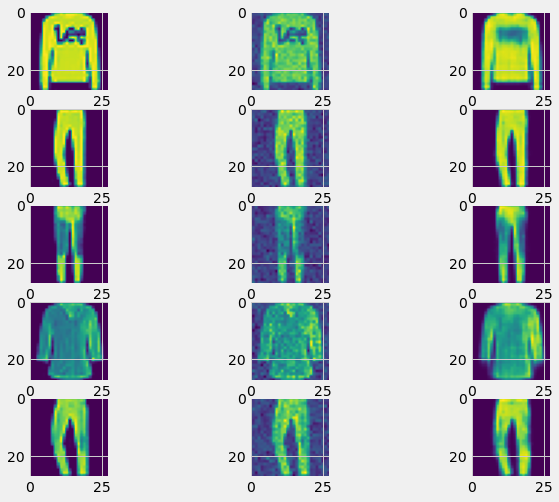

In [ ]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
print('------------------ Under Complete AutoEncoder ------------------')
data = iter(test_loader).next()
img, _ = data
images = img.view(-1, 28*28).cuda()
noisy_images = images + 0.1 * torch.randn_like(images).cuda()
with torch.no_grad():
  output = model(images)

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(5,3, figsize=(10, 8)) 

print('--------- First Column:  Original pictures')
print('--------- Second Column: Noisy pictures')
print('--------- Third Column:  Denoised pictures')

ax[0][0].imshow(images.view(-1, 28,28)[1].cpu())
ax[0][1].imshow(noisy_images.view(-1, 28,28)[1].cpu())
ax[0][2].imshow(output.view(-1, 28,28)[1].cpu())

ax[1][0].imshow(images.view(-1, 28,28)[2].cpu())
ax[1][1].imshow(noisy_images.view(-1, 28,28)[2].cpu())
ax[1][2].imshow(output.view(-1, 28,28)[2].cpu())

ax[2][0].imshow(images.view(-1, 28,28)[3].cpu())
ax[2][1].imshow(noisy_images.view(-1, 28,28)[3].cpu())
ax[2][2].imshow(output.view(-1, 28,28)[3].cpu())

ax[3][0].imshow(images.view(-1, 28,28)[4].cpu())
ax[3][1].imshow(noisy_images.view(-1, 28,28)[4].cpu())
ax[3][2].imshow(output.view(-1, 28,28)[4].cpu())

ax[4][0].imshow(images.view(-1, 28,28)[5].cpu())
ax[4][1].imshow(noisy_images.view(-1, 28,28)[5].cpu())
ax[4][2].imshow(output.view(-1, 28,28)[5].cpu())

f.show()

## Over Complete Autoencoder

In [ ]:
# -------------------------------- Over Complete AutoEncoder
learning_rate = 1e-3
model = autoencoder(1024, 2048).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_().cuda()
        noisy_images = images + 0.1*torch.randn_like(images).cuda()
        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        loss = 0
        for i, data in enumerate(test_loader):
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_().cuda()
            output = model(images)
            loss += criterion(output, images)
        print('MSE Loss for Test Data:{:.4f}'.format(loss.item()/(i+1)))
    # Calculate MSE Test Loss


epoch [1/33], loss:0.0128
MSE Loss for Test Data:0.0120
epoch [2/33], loss:0.0080
epoch [3/33], loss:0.0077
epoch [4/33], loss:0.0076
epoch [5/33], loss:0.0060
epoch [6/33], loss:0.0066
epoch [7/33], loss:0.0065
epoch [8/33], loss:0.0055
epoch [9/33], loss:0.0056
epoch [10/33], loss:0.0055
epoch [11/33], loss:0.0052
MSE Loss for Test Data:0.0047
epoch [12/33], loss:0.0055
epoch [13/33], loss:0.0054
epoch [14/33], loss:0.0056
epoch [15/33], loss:0.0049
epoch [16/33], loss:0.0045
epoch [17/33], loss:0.0045
epoch [18/33], loss:0.0051
epoch [19/33], loss:0.0046
epoch [20/33], loss:0.0048
epoch [21/33], loss:0.0054
MSE Loss for Test Data:0.0043
epoch [22/33], loss:0.0044
epoch [23/33], loss:0.0045
epoch [24/33], loss:0.0049
epoch [25/33], loss:0.0040
epoch [26/33], loss:0.0041
epoch [27/33], loss:0.0044
epoch [28/33], loss:0.0046
epoch [29/33], loss:0.0042
epoch [30/33], loss:0.0045
epoch [31/33], loss:0.0044
MSE Loss for Test Data:0.0039
epoch [32/33], loss:0.0041
epoch [33/33], loss:0.004

------------------ Over Complete AutoEncoder ------------------
--------- First Column:  Original pictures
--------- Second Column: Noisy pictures
--------- Third Column:  Denoised pictures


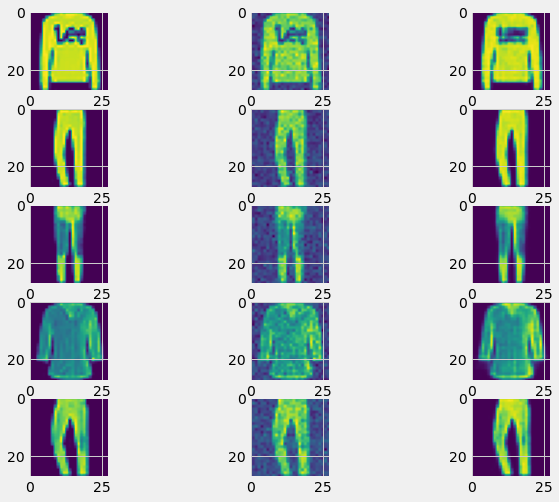

In [ ]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
print('------------------ Over Complete AutoEncoder ------------------')
data = iter(test_loader).next()
img, _ = data
images = img.view(-1, 28*28).cuda()
noisy_images = images + 0.1 * torch.randn_like(images).cuda()
with torch.no_grad():
  output = model(images)

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(5,3, figsize=(10, 8)) 

print('--------- First Column:  Original pictures')
print('--------- Second Column: Noisy pictures')
print('--------- Third Column:  Denoised pictures')

ax[0][0].imshow(images.view(-1, 28,28)[1].cpu())
ax[0][1].imshow(noisy_images.view(-1, 28,28)[1].cpu())
ax[0][2].imshow(output.view(-1, 28,28)[1].cpu())

ax[1][0].imshow(images.view(-1, 28,28)[2].cpu())
ax[1][1].imshow(noisy_images.view(-1, 28,28)[2].cpu())
ax[1][2].imshow(output.view(-1, 28,28)[2].cpu())

ax[2][0].imshow(images.view(-1, 28,28)[3].cpu())
ax[2][1].imshow(noisy_images.view(-1, 28,28)[3].cpu())
ax[2][2].imshow(output.view(-1, 28,28)[3].cpu())

ax[3][0].imshow(images.view(-1, 28,28)[4].cpu())
ax[3][1].imshow(noisy_images.view(-1, 28,28)[4].cpu())
ax[3][2].imshow(output.view(-1, 28,28)[4].cpu())

ax[4][0].imshow(images.view(-1, 28,28)[5].cpu())
ax[4][1].imshow(noisy_images.view(-1, 28,28)[5].cpu())
ax[4][2].imshow(output.view(-1, 28,28)[5].cpu())

f.show()

# Report

MSE is lower in Over Complete case rather than Under Complete case.

This is because in under complete case, we lose some information in the middle layer as we have fewer nodes. However, in Over complete case there are enough features in the middle layer to keep and represent the input

# Regularized Autoencoder Architecture

In [ ]:
class autoencoder_Regularized(nn.Module):
    def __init__(self, h_dim, z_dim):
        super(autoencoder_Regularized, self).__init__()
        
        img_size = 28*28

        self.encoder = nn.Sequential(nn.Linear(img_size, h_dim),
                                     nn.Dropout(p = 0.3),
                                     nn.ReLU(),
                                     nn.Linear(h_dim, z_dim))
        self.decoder = nn.Sequential(nn.Linear(z_dim, h_dim),
                                     nn.Dropout(p = 0.3),
                                     nn.ReLU(),
                                     nn.Linear(h_dim, img_size),
                                     nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#  The less p, the better result

# Evaluation

## Dropout

In [ ]:
learning_rate = 1e-3
model = autoencoder_Regularized(1024, 2096).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_().cuda()
        noisy_images = images + 0.1*torch.randn_like(images).cuda()
        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    # Calculate MSE Test Loss
    if epoch % 10 == 0:
        loss = 0
        for i, data in enumerate(test_loader):
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_().cuda()
            output = model(images)
            loss += criterion(output, images)
        print('MSE Loss for Test Data:{:.4f}'.format(loss.item()/(i+1)))

epoch [1/33], loss:0.0159
MSE Loss for Test Data:0.0174
epoch [2/33], loss:0.0148
epoch [3/33], loss:0.0156
epoch [4/33], loss:0.0146
epoch [5/33], loss:0.0140
epoch [6/33], loss:0.0149
epoch [7/33], loss:0.0136
epoch [8/33], loss:0.0134
epoch [9/33], loss:0.0130
epoch [10/33], loss:0.0118
epoch [11/33], loss:0.0152
MSE Loss for Test Data:0.0130
epoch [12/33], loss:0.0144
epoch [13/33], loss:0.0137
epoch [14/33], loss:0.0126
epoch [15/33], loss:0.0138
epoch [16/33], loss:0.0151
epoch [17/33], loss:0.0132
epoch [18/33], loss:0.0133
epoch [19/33], loss:0.0123
epoch [20/33], loss:0.0127
epoch [21/33], loss:0.0131
MSE Loss for Test Data:0.0126
epoch [22/33], loss:0.0123
epoch [23/33], loss:0.0120
epoch [24/33], loss:0.0134
epoch [25/33], loss:0.0129
epoch [26/33], loss:0.0136
epoch [27/33], loss:0.0123
epoch [28/33], loss:0.0125
epoch [29/33], loss:0.0113
epoch [30/33], loss:0.0126
epoch [31/33], loss:0.0126
MSE Loss for Test Data:0.0121
epoch [32/33], loss:0.0113
epoch [33/33], loss:0.012

------------------ Dropout Regularization AutoEncoder ------------------
--------- First Column:  Original pictures
--------- Second Column: Noisy pictures
--------- Third Column:  Denoised pictures


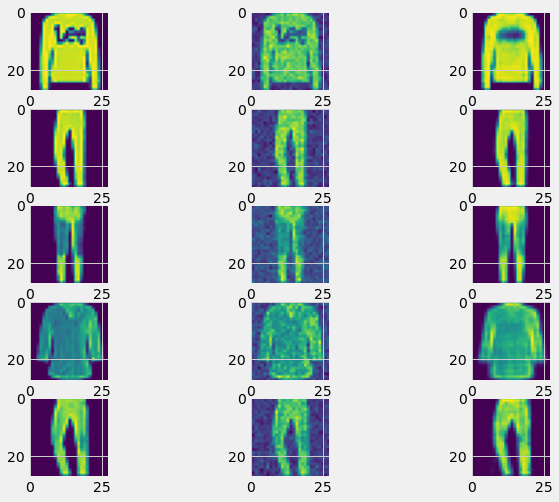

In [ ]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
print('------------------ Dropout Regularization AutoEncoder ------------------')
data = iter(test_loader).next()
img, _ = data
images = img.view(-1, 28*28).cuda()
noisy_images = images + 0.1 * torch.randn_like(images).cuda()
with torch.no_grad():
  output = model(images)

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(5,3, figsize=(10, 8)) 

print('--------- First Column:  Original pictures')
print('--------- Second Column: Noisy pictures')
print('--------- Third Column:  Denoised pictures')

ax[0][0].imshow(images.view(-1, 28,28)[1].cpu())
ax[0][1].imshow(noisy_images.view(-1, 28,28)[1].cpu())
ax[0][2].imshow(output.view(-1, 28,28)[1].cpu())

ax[1][0].imshow(images.view(-1, 28,28)[2].cpu())
ax[1][1].imshow(noisy_images.view(-1, 28,28)[2].cpu())
ax[1][2].imshow(output.view(-1, 28,28)[2].cpu())

ax[2][0].imshow(images.view(-1, 28,28)[3].cpu())
ax[2][1].imshow(noisy_images.view(-1, 28,28)[3].cpu())
ax[2][2].imshow(output.view(-1, 28,28)[3].cpu())

ax[3][0].imshow(images.view(-1, 28,28)[4].cpu())
ax[3][1].imshow(noisy_images.view(-1, 28,28)[4].cpu())
ax[3][2].imshow(output.view(-1, 28,28)[4].cpu())

ax[4][0].imshow(images.view(-1, 28,28)[5].cpu())
ax[4][1].imshow(noisy_images.view(-1, 28,28)[5].cpu())
ax[4][2].imshow(output.view(-1, 28,28)[5].cpu())

f.show()

## L1

In [ ]:
learning_rate = 1e-3
model = autoencoder(1024, 2048).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_().cuda()
        noisy_images = images + 0.1*torch.randn_like(images).cuda()
        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        
        # L1 Norm
        reg_loss = torch.tensor(0.).cuda()
        for param in model.parameters():
            reg_loss += torch.norm(param, 1)

        loss +=  1e-6*reg_loss
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        loss = 0
        for i, data in enumerate(test_loader):
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_().cuda()
            output = model(images)
            loss += criterion(output, images)
        print('MSE Loss for Test Data:{:.4f}'
          .format(loss.item()/(i+1)))
    # Calculate MSE Test Loss


epoch [1/33], loss:0.0269
MSE Loss for Test Data:0.0198
epoch [2/33], loss:0.0239
epoch [3/33], loss:0.0210
epoch [4/33], loss:0.0190
epoch [5/33], loss:0.0177
epoch [6/33], loss:0.0182
epoch [7/33], loss:0.0164
epoch [8/33], loss:0.0175
epoch [9/33], loss:0.0177
epoch [10/33], loss:0.0170
epoch [11/33], loss:0.0167
MSE Loss for Test Data:0.0120
epoch [12/33], loss:0.0147
epoch [13/33], loss:0.0160
epoch [14/33], loss:0.0167
epoch [15/33], loss:0.0155
epoch [16/33], loss:0.0159
epoch [17/33], loss:0.0160
epoch [18/33], loss:0.0154
epoch [19/33], loss:0.0156
epoch [20/33], loss:0.0154
epoch [21/33], loss:0.0153
MSE Loss for Test Data:0.0106
epoch [22/33], loss:0.0156
epoch [23/33], loss:0.0148
epoch [24/33], loss:0.0144
epoch [25/33], loss:0.0150
epoch [26/33], loss:0.0132
epoch [27/33], loss:0.0135
epoch [28/33], loss:0.0136
epoch [29/33], loss:0.0139
epoch [30/33], loss:0.0137
epoch [31/33], loss:0.0147
MSE Loss for Test Data:0.0098
epoch [32/33], loss:0.0137
epoch [33/33], loss:0.014

------------------ L1 Regularization AutoEncoder ------------------
--------- First Column:  Original pictures
--------- Second Column: Noisy pictures
--------- Third Column:  Denoised pictures


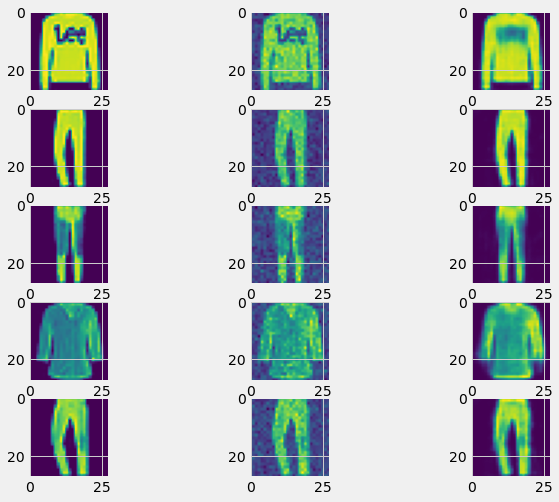

In [ ]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
print('------------------ L1 Regularization AutoEncoder ------------------')
data = iter(test_loader).next()
img, _ = data
images = img.view(-1, 28*28).cuda()
noisy_images = images + 0.1 * torch.randn_like(images).cuda()
with torch.no_grad():
  output = model(images)

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(5,3, figsize=(10, 8)) 

print('--------- First Column:  Original pictures')
print('--------- Second Column: Noisy pictures')
print('--------- Third Column:  Denoised pictures')

ax[0][0].imshow(images.view(-1, 28,28)[1].cpu())
ax[0][1].imshow(noisy_images.view(-1, 28,28)[1].cpu())
ax[0][2].imshow(output.view(-1, 28,28)[1].cpu())

ax[1][0].imshow(images.view(-1, 28,28)[2].cpu())
ax[1][1].imshow(noisy_images.view(-1, 28,28)[2].cpu())
ax[1][2].imshow(output.view(-1, 28,28)[2].cpu())

ax[2][0].imshow(images.view(-1, 28,28)[3].cpu())
ax[2][1].imshow(noisy_images.view(-1, 28,28)[3].cpu())
ax[2][2].imshow(output.view(-1, 28,28)[3].cpu())

ax[3][0].imshow(images.view(-1, 28,28)[4].cpu())
ax[3][1].imshow(noisy_images.view(-1, 28,28)[4].cpu())
ax[3][2].imshow(output.view(-1, 28,28)[4].cpu())

ax[4][0].imshow(images.view(-1, 28,28)[5].cpu())
ax[4][1].imshow(noisy_images.view(-1, 28,28)[5].cpu())
ax[4][2].imshow(output.view(-1, 28,28)[5].cpu())

f.show()

## L2

In [ ]:
learning_rate = 1e-3
model = autoencoder(1024, 2048).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_().cuda()
        noisy_images = images + (0.01**0.5)*torch.randn_like(images).cuda()
        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        # L1 Norm
        reg_loss = torch.tensor(0.).cuda()
        for param in model.parameters():
            reg_loss += torch.norm(param, 2)

        loss += 1e-4*reg_loss
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        loss = 0
        for i, data in enumerate(test_loader):
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_().cuda()
            output = model(images)
            loss += criterion(output, images)
        print('MSE Loss for Test Data:{:.4f}'
          .format(loss.item()/(i+1)))
    # Calculate MSE Test Loss


epoch [1/33], loss:0.0221
MSE Loss for Test Data:0.0147
epoch [2/33], loss:0.0189
epoch [3/33], loss:0.0181
epoch [4/33], loss:0.0171
epoch [5/33], loss:0.0163
epoch [6/33], loss:0.0166
epoch [7/33], loss:0.0167
epoch [8/33], loss:0.0161
epoch [9/33], loss:0.0158
epoch [10/33], loss:0.0173
epoch [11/33], loss:0.0168
MSE Loss for Test Data:0.0088
epoch [12/33], loss:0.0155
epoch [13/33], loss:0.0153
epoch [14/33], loss:0.0166
epoch [15/33], loss:0.0144
epoch [16/33], loss:0.0154
epoch [17/33], loss:0.0171
epoch [18/33], loss:0.0163
epoch [19/33], loss:0.0147
epoch [20/33], loss:0.0167
epoch [21/33], loss:0.0148
MSE Loss for Test Data:0.0083
epoch [22/33], loss:0.0162
epoch [23/33], loss:0.0162
epoch [24/33], loss:0.0156
epoch [25/33], loss:0.0148
epoch [26/33], loss:0.0152
epoch [27/33], loss:0.0146
epoch [28/33], loss:0.0140
epoch [29/33], loss:0.0160
epoch [30/33], loss:0.0153
epoch [31/33], loss:0.0150
MSE Loss for Test Data:0.0082
epoch [32/33], loss:0.0168
epoch [33/33], loss:0.015

------------------ L2 Regularization AutoEncoder ------------------
--------- First Column:  Original pictures
--------- Second Column: Noisy pictures
--------- Third Column:  Denoised pictures


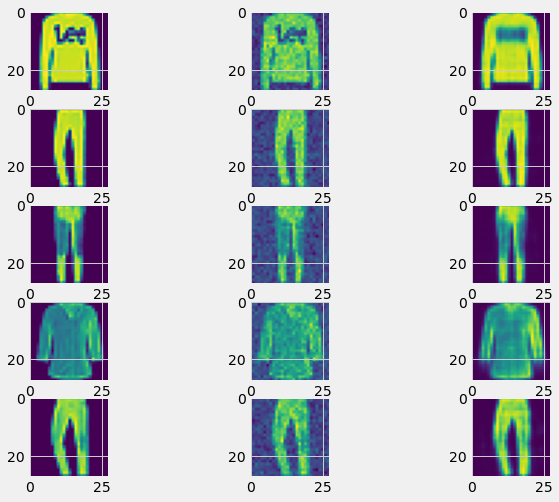

In [ ]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
print('------------------ L2 Regularization AutoEncoder ------------------')
data = iter(test_loader).next()
img, _ = data
images = img.view(-1, 28*28).cuda()
noisy_images = images + 0.1 * torch.randn_like(images).cuda()
with torch.no_grad():
  output = model(images)

#subplot(r,c) provide the no. of rows and columns
f, ax = plt.subplots(5,3, figsize=(10, 8)) 

print('--------- First Column:  Original pictures')
print('--------- Second Column: Noisy pictures')
print('--------- Third Column:  Denoised pictures')

ax[0][0].imshow(images.view(-1, 28,28)[1].cpu())
ax[0][1].imshow(noisy_images.view(-1, 28,28)[1].cpu())
ax[0][2].imshow(output.view(-1, 28,28)[1].cpu())

ax[1][0].imshow(images.view(-1, 28,28)[2].cpu())
ax[1][1].imshow(noisy_images.view(-1, 28,28)[2].cpu())
ax[1][2].imshow(output.view(-1, 28,28)[2].cpu())

ax[2][0].imshow(images.view(-1, 28,28)[3].cpu())
ax[2][1].imshow(noisy_images.view(-1, 28,28)[3].cpu())
ax[2][2].imshow(output.view(-1, 28,28)[3].cpu())

ax[3][0].imshow(images.view(-1, 28,28)[4].cpu())
ax[3][1].imshow(noisy_images.view(-1, 28,28)[4].cpu())
ax[3][2].imshow(output.view(-1, 28,28)[4].cpu())

ax[4][0].imshow(images.view(-1, 28,28)[5].cpu())
ax[4][1].imshow(noisy_images.view(-1, 28,28)[5].cpu())
ax[4][2].imshow(output.view(-1, 28,28)[5].cpu())

f.show()

# Report

1. Compared to pure over comlete method, where we did not have any regularization, in this section the MSE has been increased. It means that regularization techniques are not useful here in non of their forms. However, we expected that they should decrease MSE as they mitigiate overfitting problem. Since here we have a large dataset, overfitting is not the case.

2. Between these 3 regularization techniques, L2 Norm has the best performance while L1 norm has the worst. 

3. Needless to say, the effect of regularization highly depends on its coefficient in loss function. Here, as this coefficient is reduced, the performance is improved.